In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [169]:
traindata = pd.read_csv("hr-total-scale-ats-cat-unbalanced.csv",index_col=0)

In [170]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 65438 to 51526
Data columns (total 69 columns):
age                  52399 non-null int64
length_of_service    52399 non-null int64
KPIs_met >80%        52399 non-null int64
awards_won?          52399 non-null int64
is_promoted          52399 non-null int64
region_10            52399 non-null int64
region_11            52399 non-null int64
region_12            52399 non-null int64
region_13            52399 non-null int64
region_14            52399 non-null int64
region_15            52399 non-null int64
region_16            52399 non-null int64
region_17            52399 non-null int64
region_18            52399 non-null int64
region_19            52399 non-null int64
region_2             52399 non-null int64
region_20            52399 non-null int64
region_21            52399 non-null int64
region_22            52399 non-null int64
region_23            52399 non-null int64
region_24            52399 non-null int64
regio

In [171]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

Split data set into training and test sets

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

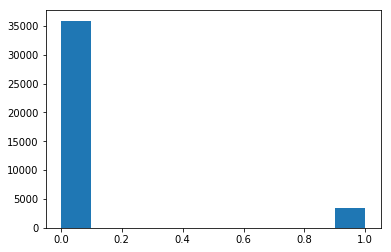

In [173]:
plt.hist(Y_train);
plt.show()

here 0 and 1 are not of same proportion, we assign weight so model gives same priority to yes or no cases.

In [174]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [175]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [176]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
lrmodel = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight={0:0.5476144027646174, 1:5.75051214515657})

In [177]:
lrmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [178]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lrmodel, X, Y, cv=5)
print(cv_results)

[0.75355405 0.76125954 0.75505725 0.75589274 0.7597099 ]


In [179]:
np.mean(cv_results)

0.7570946955836575

In [162]:
lrmodel.score(X_train, Y_train)

0.7510623679991857

In [180]:
import statsmodels.api as sm
X2 = sm.add_constant(X_traindata)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.205998
         Iterations: 35
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.302     
Dependent Variable:     y                  AIC:                21726.1831
Date:                   2019-06-27 08:16   BIC:                22337.9815
No. Observations:       52399              Log-Likelihood:     -10794.   
Df Model:               68                 LL-Null:            -15456.   
Df Residuals:           52330              LLR p-value:        0.0000    
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------
const             -11.4932    0.2790 -41.1961 0.0000   -12.0401  -10.9464
ag

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
X_traindata.columns

Index(['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'Below Secondary', 'Master's & above', 'Finance', 'HR', 'Legal',
       'Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 'm', 'r2', 'r3',
       'r4', 'r5', 'referred', 'sourcing', '55-62', '63-69', '70-87', '88-91',
       '92 and above'],
      dtype='object')

In [139]:
cols = ['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?', "Master's & above", 'Finance', 'HR', 'Legal',
       'Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 't5', 'm', 'r2', 'r3',
       'r4', 'r5','55-62', '63-69', '70-87', '88-91',
       '92 and above']

In [140]:
X_traindata_final = X_traindata[cols]

In [141]:
X2 = sm.add_constant(X_traindata_final)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.208637
         Iterations 9
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.293     
Dependent Variable:   y                 AIC:               21920.7351
Date:                 2019-06-27 08:07  BIC:               22169.0011
No. Observations:     52399             Log-Likelihood:    -10932.   
Df Model:             27                LL-Null:           -15456.   
Df Residuals:         52371             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       9.0000                                         
---------------------------------------------------------------------
                   Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
const             -11.4883   0.2219 -51.7627 0.0000 -11.9233 -11.0533
age             

In [183]:
lrmodel.fit(X_train, Y_train)
Y_predictions = lrmodel.predict(X_test)

In [184]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [185]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/confusion-matrix.png", width=400)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predictions)

array([[9037, 2934],
       [ 205,  924]], dtype=int64)

In [187]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/precision-recall-f1score.png",width=500)

In [188]:
print(classification_report(Y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     11971
           1       0.24      0.82      0.37      1129

   micro avg       0.76      0.76      0.76     13100
   macro avg       0.61      0.79      0.61     13100
weighted avg       0.91      0.76      0.81     13100



1.High precision means not many people who don't deserve promotion didn't get promoted.

2.High recall means predicted most people who are likely to get promoted.

In [189]:
print("Accuracy:",accuracy_score(Y_test, Y_predictions))

Accuracy: 0.760381679389313


In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

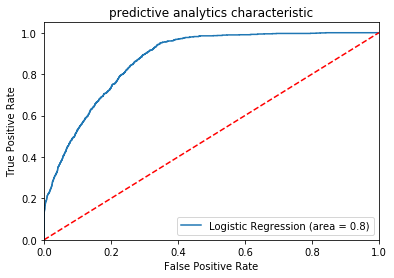

In [191]:
logit_roc_auc = roc_auc_score(Y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finding out using test data given in the problem set

In [192]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [193]:
X_testdata1 = X_testdata.values

In [194]:
lrmodel.fit(X, Y)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)